In [82]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [83]:
df = pd.read_csv('credit.csv')

In [84]:
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

In [86]:
df.duplicated().sum()

0

In [87]:
df.shape

(1000, 17)

In [88]:
df.describe()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [89]:
obj_list = []
num_list = []
for i in df.columns:
    if df[i].dtype == 'object':
        obj_list.append(i)
        print(f'value counts for {i} is:')
        print(df[i].value_counts())
        print('_________________________________')
        df[i] = pd.Categorical(df[i])
    else:
        num_list.append(i)

value counts for checking_balance is:
unknown       394
< 0 DM        274
1 - 200 DM    269
> 200 DM       63
Name: checking_balance, dtype: int64
_________________________________
value counts for credit_history is:
good         530
critical     293
poor          88
very good     49
perfect       40
Name: credit_history, dtype: int64
_________________________________
value counts for purpose is:
furniture/appliances    473
car                     337
business                 97
education                59
renovations              22
car0                     12
Name: purpose, dtype: int64
_________________________________
value counts for savings_balance is:
< 100 DM         603
unknown          183
100 - 500 DM     103
500 - 1000 DM     63
> 1000 DM         48
Name: savings_balance, dtype: int64
_________________________________
value counts for employment_duration is:
1 - 4 years    339
> 7 years      253
4 - 7 years    174
< 1 year       172
unemployed      62
Name: employment_durat

In [90]:
obj_list

['checking_balance',
 'credit_history',
 'purpose',
 'savings_balance',
 'employment_duration',
 'other_credit',
 'housing',
 'job',
 'phone',
 'default']

In [91]:
num_list

['months_loan_duration',
 'amount',
 'percent_of_income',
 'years_at_residence',
 'age',
 'existing_loans_count',
 'dependents']

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   checking_balance      1000 non-null   category
 1   months_loan_duration  1000 non-null   int64   
 2   credit_history        1000 non-null   category
 3   purpose               1000 non-null   category
 4   amount                1000 non-null   int64   
 5   savings_balance       1000 non-null   category
 6   employment_duration   1000 non-null   category
 7   percent_of_income     1000 non-null   int64   
 8   years_at_residence    1000 non-null   int64   
 9   age                   1000 non-null   int64   
 10  other_credit          1000 non-null   category
 11  housing               1000 non-null   category
 12  existing_loans_count  1000 non-null   int64   
 13  job                   1000 non-null   category
 14  dependents            1000 non-null   int64   
 15  phone

In [93]:
restruct = {
            'checking_balance' : {'unknown' : -1, '< 0 DM' : 1, '1 - 200 DM' : 2, '> 200 DM' : 3},
            'credit_history' : {'critical' : 1, 'poor' : 2, 'good' : 3, 'very good' : 4, 'perfect' : 5},
            'savings_balance' : {'unknown' : -1, '< 100 DM' : 1, '100 - 500 DM' : 2, '500 - 1000 DM' : 3, '> 1000 DM' : 4},
            'employment_duration' : {'unemployed' : 1, '< 1 year' : 2, '1 - 4 years' : 3, '4 - 7 years' : 4, '> 7 years' : 5},
            'phone' : {'no' : 1, 'yes' : 2},
            #'default' : {'no' : 0, 'yes' : 1}
            }

onehotcols = ["purpose","housing","other_credit","job"]

In [94]:
df = df.replace(restruct)
df = pd.get_dummies(df, columns=onehotcols)
df.head()

,checking_balance,months_loan_duration,credit_history,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,existing_loans_count,...,housing_other,housing_own,housing_rent,other_credit_bank,other_credit_none,other_credit_store,job_management,job_skilled,job_unemployed,job_unskilled
0,1,6,1,1169,-1,5,4,4,67,2,...,0,1,0,0,1,0,0,1,0,0
1,2,48,3,5951,1,3,2,2,22,1,...,0,1,0,0,1,0,0,1,0,0
2,-1,12,1,2096,1,4,2,3,49,1,...,0,1,0,0,1,0,0,0,0,1
3,1,42,3,7882,1,4,2,4,45,1,...,1,0,0,0,1,0,0,1,0,0
4,1,24,2,4870,1,3,3,4,53,2,...,1,0,0,0,1,0,0,1,0,0


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   checking_balance              1000 non-null   int64   
 1   months_loan_duration          1000 non-null   int64   
 2   credit_history                1000 non-null   int64   
 3   amount                        1000 non-null   int64   
 4   savings_balance               1000 non-null   int64   
 5   employment_duration           1000 non-null   int64   
 6   percent_of_income             1000 non-null   int64   
 7   years_at_residence            1000 non-null   int64   
 8   age                           1000 non-null   int64   
 9   existing_loans_count          1000 non-null   int64   
 10  dependents                    1000 non-null   int64   
 11  phone                         1000 non-null   int64   
 12  default                       1000 non-null   cat

In [96]:
df.shape

(1000, 29)

In [97]:
X = df.drop('default', axis=1)
y = df['default']

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [99]:
dTree = DecisionTreeClassifier(random_state=1)

In [100]:
dTree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

In [101]:
dTree.score(X_train,y_train)

1.0

In [102]:
dTree.score(X_test,y_test)

0.6933333333333334

In [103]:
#Regularization
dTreeR = DecisionTreeClassifier(max_depth=3,random_state=1)
dTreeR.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [104]:
dTreeR.score(X_train,y_train)

0.7528571428571429

In [105]:
dTreeR.score(X_test,y_test)

0.7433333333333333

In [106]:
imp_feat = pd.DataFrame(dTreeR.feature_importances_,columns=['Imp'],index=X_train.columns)
imp_feat

,Imp
checking_balance,0.492510
months_loan_duration,0.169806
credit_history,0.166109
amount,0.000000
savings_balance,0.064467
employment_duration,0.000000
percent_of_income,0.000000
years_at_residence,0.000000
age,0.000000
existing_loans_count,0.000000


In [107]:
from sklearn.metrics import plot_confusion_matrix

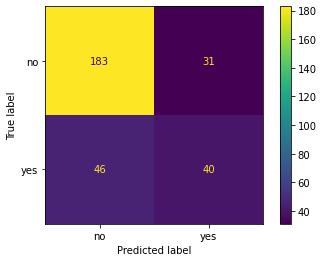

In [108]:
plot_confusion_matrix(dTreeR,X_test,y_test)

In [109]:
# Bagging

In [110]:
from sklearn.ensemble import BaggingClassifier

In [111]:
BC = BaggingClassifier(base_estimator=dTree,n_estimators=50,random_state=1)

In [112]:
BC.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1),
                  n_estimators=50, random_state=1)

In [113]:
BC.score(X_train,y_train)

1.0

In [114]:
BC.score(X_test,y_test)

0.7733333333333333

In [115]:
# Boosting

In [116]:
from sklearn.ensemble import AdaBoostClassifier

In [117]:
AC = AdaBoostClassifier(n_estimators=10, random_state=1)

In [118]:
AC.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=10, random_state=1)

In [119]:
AC.score(X_train,y_train)

0.7657142857142857

In [120]:
AC.score(X_test,y_test)

0.74

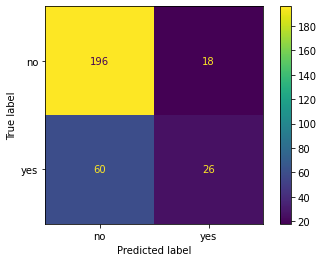

In [121]:
plot_confusion_matrix(AC,X_test,y_test);

In [122]:
#GradientBoost
from sklearn.ensemble import GradientBoostingClassifier

In [123]:
GC = GradientBoostingClassifier(n_estimators=50,random_state=1)

In [124]:
GC.fit(X_train,y_train)

GradientBoostingClassifier(n_estimators=50, random_state=1)

In [125]:
GC.score(X_train,y_train)

0.8657142857142858

In [126]:
GC.score(X_test,y_test)

0.74

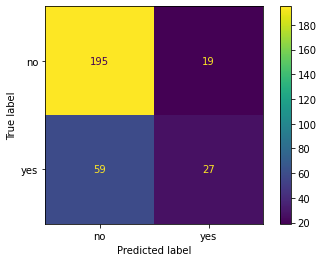

In [127]:
plot_confusion_matrix(GC,X_test,y_test);

In [128]:
#RandomForest

In [137]:
from sklearn.ensemble import RandomForestClassifier

In [138]:
RC = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)

In [139]:
RC.fit(X_train,y_train)

RandomForestClassifier(max_features=12, n_estimators=50, random_state=1)

In [140]:
RC.score(X_train,y_train)

0.9985714285714286

In [141]:
RC.score(X_test,y_test)

0.7766666666666666

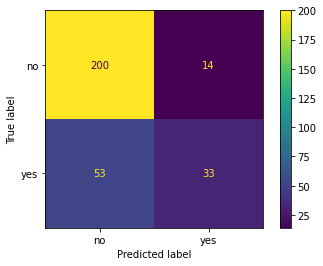

In [142]:
plot_confusion_matrix(RC,X_test,y_test);